In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
df = pd.read_csv('complete_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 30 non-null     int64  
 1   Pylint for Stack Overflow  30 non-null     float64
 2   Radon for Stack Overflow   30 non-null     float64
 3   Flesch for Stack Overflow  30 non-null     float64
 4   Pylint for Chatgpt         30 non-null     float64
 5   Radon for Chatgpt          30 non-null     float64
 6   Flesch for Chatgpt         30 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.8 KB


In [3]:
df.head(5)

,Unnamed: 0,Pylint for Stack Overflow,Radon for Stack Overflow,Flesch for Stack Overflow,Pylint for Chatgpt,Radon for Chatgpt,Flesch for Chatgpt
0,0,4.81,3.666667,56.913333,6.0,5.0,59.688084
1,1,7.43,2.666667,59.616354,6.0,1.0,45.765912
2,2,5.00,4.000000,39.265385,7.5,4.5,57.371743
3,3,0.00,2.333333,72.670222,0.0,6.0,73.755909
4,4,0.00,1.000000,55.114109,0.0,7.0,48.730060


# Measuing cc score

In [4]:
def calculate_measured_score(cyclomatic_comflexity, upper_hinge, h_spread):
    upper_outer_fence = upper_hinge + 3 * h_spread
    if cyclomatic_comflexity <= upper_hinge:
        score = 100
    elif cyclomatic_comflexity > upper_outer_fence:
        score = 0
    else:
        score = 100 - ((cyclomatic_comflexity - upper_hinge) / (upper_outer_fence - upper_hinge)) * 100
    return score

In [5]:
def calculate_upper_hinge_and_h_spread(df, column_name):
    upper_hinge = np.percentile(df[column_name], 75)
    lower_hinge = np.percentile(df[column_name], 25)
    h_spread = upper_hinge - lower_hinge
    return upper_hinge, h_spread

## Distribution of the stackoverflow cc score

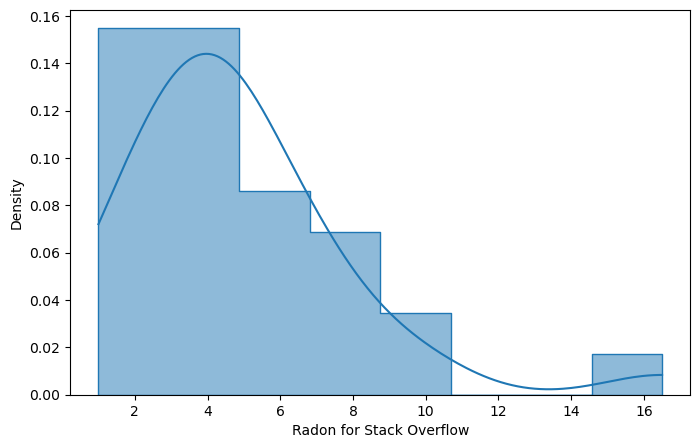

In [6]:
upper_hinge_so, h_spread_so = calculate_upper_hinge_and_h_spread(df, "Radon for Stack Overflow")
upper_hinge_so, h_spread_so

df['measured_cc_so'] = df['Radon for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so, h_spread_so))

plt.figure(figsize=(8, 5))
sns.histplot(df['Radon for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

## Distribution of the stackoverflow score after apflying measurement

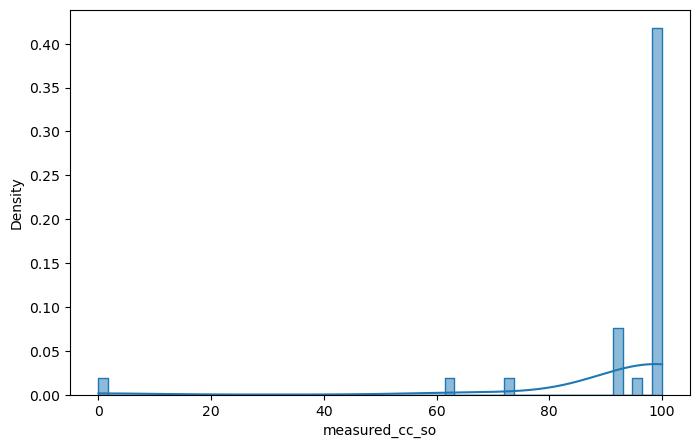

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['measured_cc_so'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT

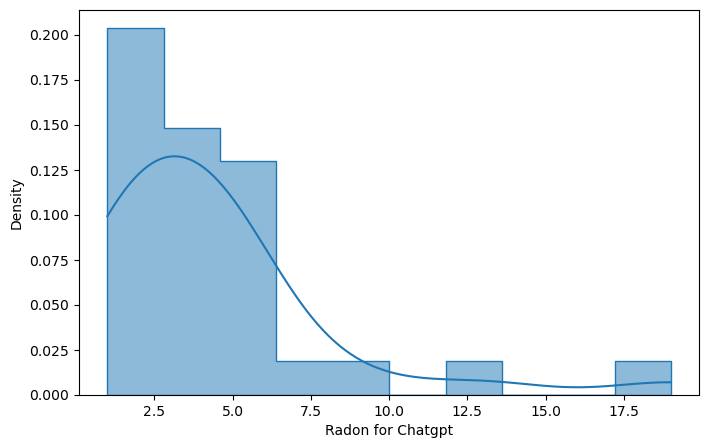

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Radon for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT after measurement

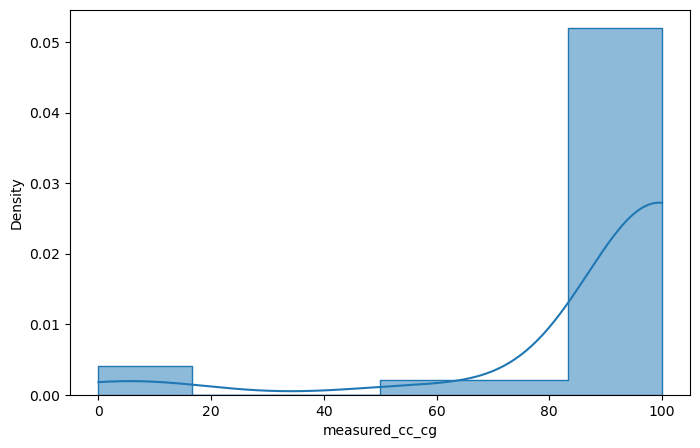

In [9]:
upper_hinge_cg, h_spread_cg = calculate_upper_hinge_and_h_spread(df, "Radon for Chatgpt")
upper_hinge_cg, h_spread_cg

df['measured_cc_cg'] = df['Radon for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg, h_spread_cg))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_cc_cg'], kde=True, stat='density', element='step')
plt.show()

## A nice looking graph to put into report

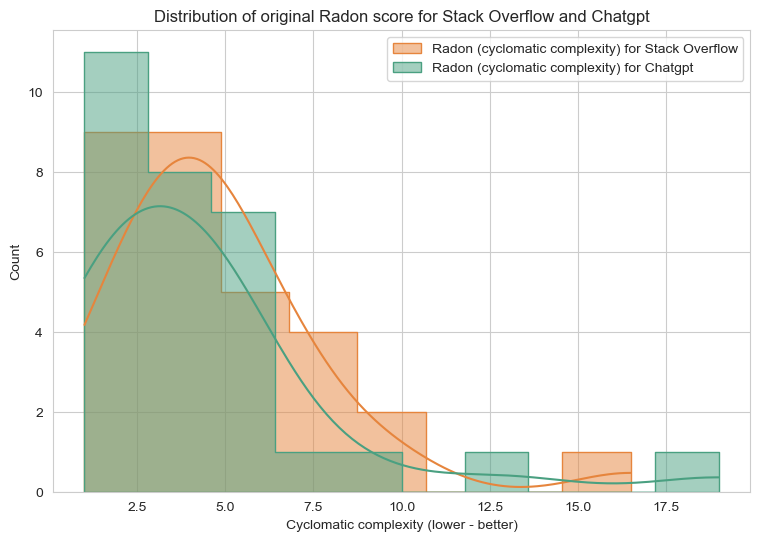

In [45]:
fig= plt.figure(figsize=(9, 6))

sns.set_style("whitegrid")

ax = sns.histplot(df['Radon for Stack Overflow'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Radon (cyclomatic complexity) for Stack Overflow')
ax = sns.histplot(df['Radon for Chatgpt'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Radon (cyclomatic complexity) for Chatgpt')

ax.set(xlabel='Cyclomatic complexity (lower - better)', ylabel='Count', title='Distribution of original Radon score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

fig.savefig("./smaller_assets/radon.png", dpi=300)

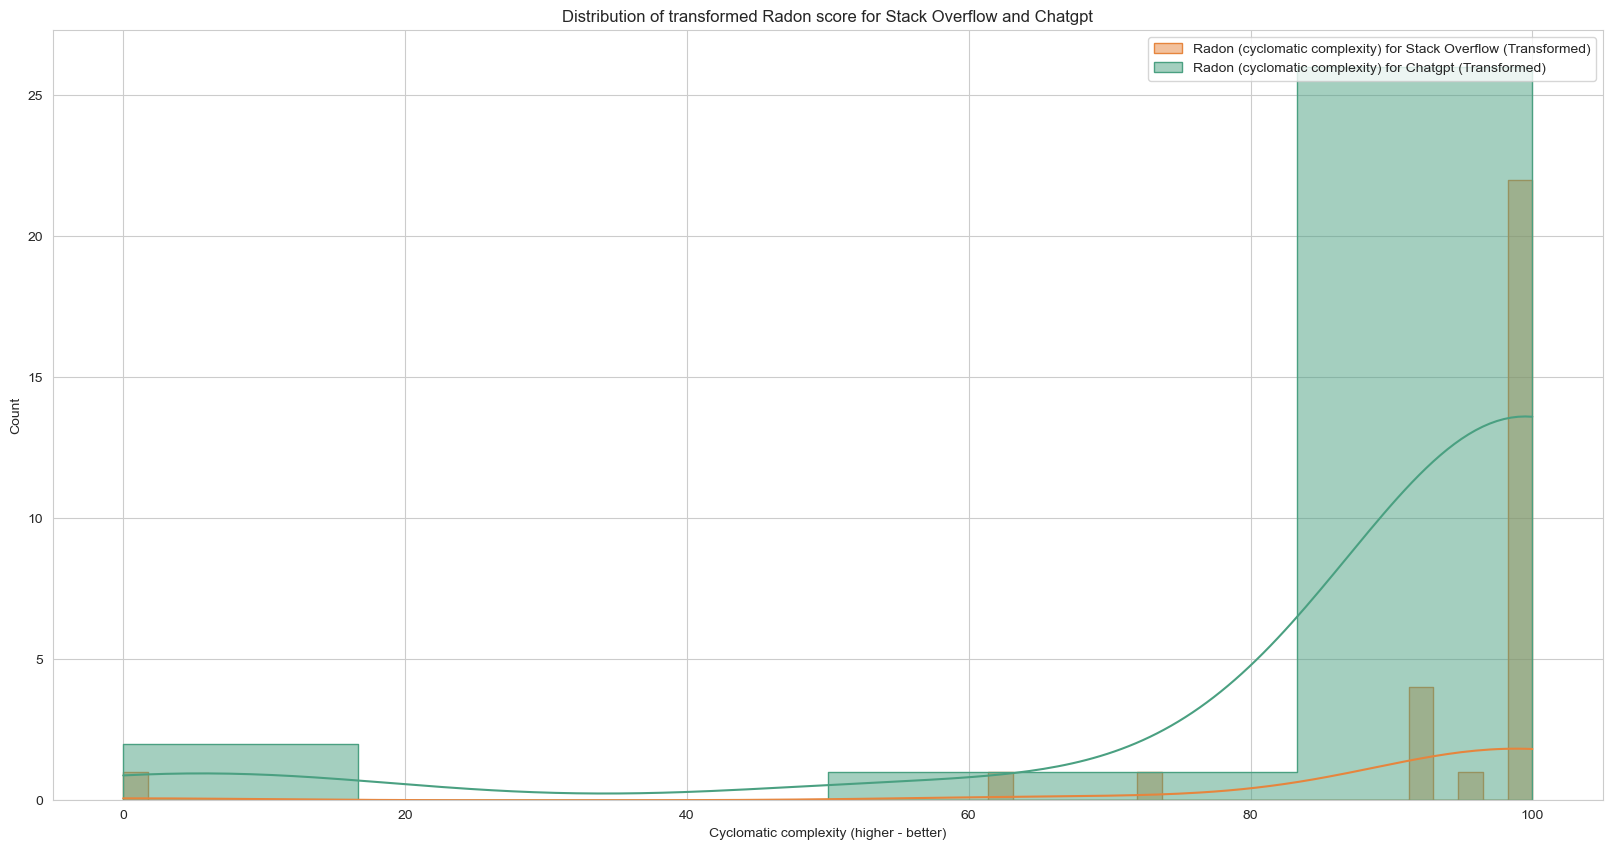

In [11]:
plt.figure(figsize=(20, 10))

sns.set_style("whitegrid")

ax = sns.histplot(df['measured_cc_so'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Radon (cyclomatic complexity) for Stack Overflow (Transformed)')
ax = sns.histplot(df['measured_cc_cg'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Radon (cyclomatic complexity) for Chatgpt (Transformed)')

ax.set(xlabel='Cyclomatic complexity (higher - better)', ylabel='Count', title='Distribution of transformed Radon score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

## Failed to reject null hypothesis.

In [12]:
# mannwhitneyu test
u, p = mannwhitneyu(df['Radon for Stack Overflow'], df['Radon for Chatgpt'])
u, p 

(526.5, 0.2591343466802988)

In [13]:
# mannwhitneyu test
u, p = mannwhitneyu(df['measured_cc_cg'], df['measured_cc_so'])
u, p 

(483.5, 0.4983786428762118)

In [14]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['Radon for Stack Overflow'], df['Radon for Chatgpt'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 0.5677803798789043
p-value: 0.5724574475494237


In [15]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_cc_cg'], df['measured_cc_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -0.3706626076481169
p-value: 0.7123162420034364


# Measuring pylint score

In [16]:
def calculate_measured_score_up(df, column_name, upper_hinge, h_spread):
    measured_scores = []
    for value in df[column_name]:
        if value >= upper_hinge:
            score = 100
        elif value <= upper_hinge - 3 * h_spread:
            score = 0
        else:
            score = 100 * (value - (upper_hinge - 3 * h_spread)) / (3 * h_spread)
        measured_scores.append(score)
    return measured_scores

## Stackover flow pylint

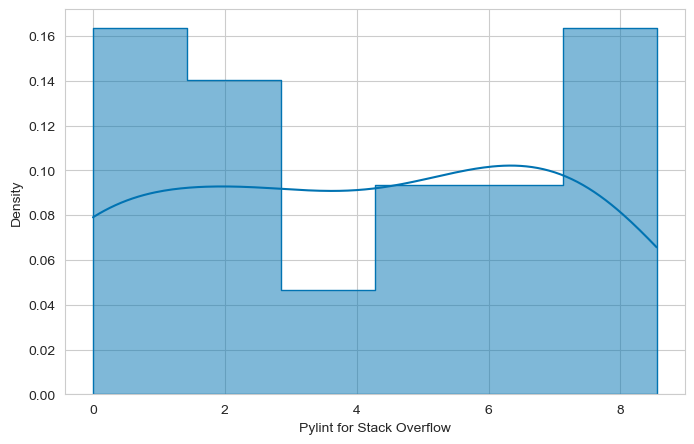

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Pylint for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

## Stackover flow pylint after measurement

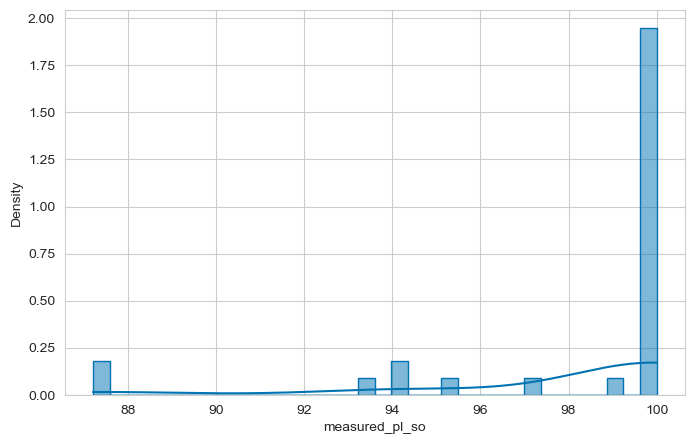

In [18]:
upper_hinge_so_pl, h_spread_so_pl = calculate_upper_hinge_and_h_spread(df, "Pylint for Stack Overflow")
upper_hinge_so_pl, h_spread_so_pl

df['measured_pl_so'] = df['Pylint for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so_pl, h_spread_so_pl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_pl_so'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT pylint

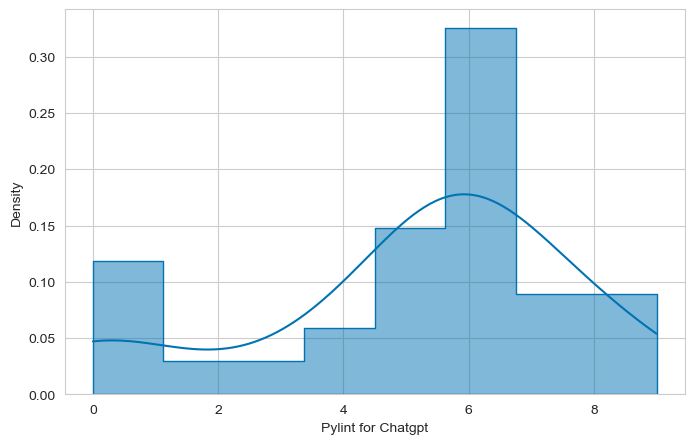

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Pylint for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT pylint after measurment

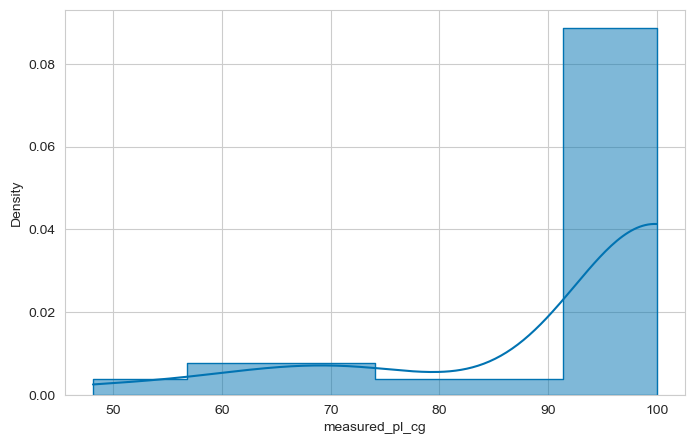

In [20]:
upper_hinge_cg_pl, h_spread_cg_pl = calculate_upper_hinge_and_h_spread(df, "Pylint for Chatgpt")
upper_hinge_cg_pl, h_spread_cg_pl

df['measured_pl_cg']= df['Pylint for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg_pl, h_spread_cg_pl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_pl_cg'], kde=True, stat='density', element='step')
plt.show()

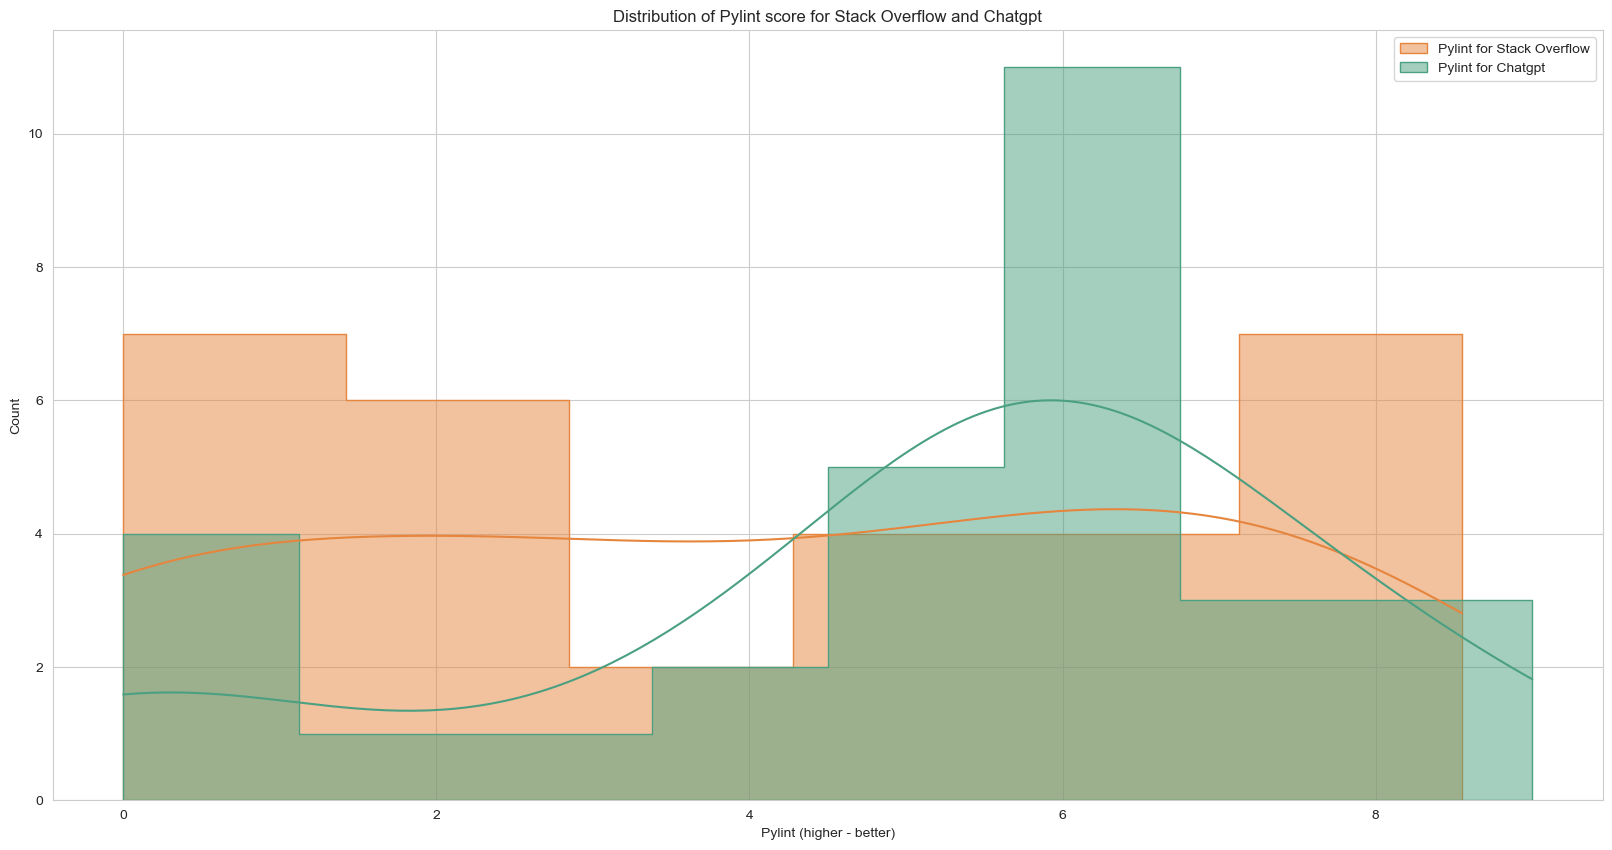

In [21]:
plt.figure(figsize=(20, 10))

sns.set_style("whitegrid")

ax = sns.histplot(df['Pylint for Stack Overflow'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Pylint for Stack Overflow')
ax = sns.histplot(df['Pylint for Chatgpt'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Pylint for Chatgpt')

ax.set(xlabel='Pylint (higher - better)', ylabel='Count', title='Distribution of Pylint score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

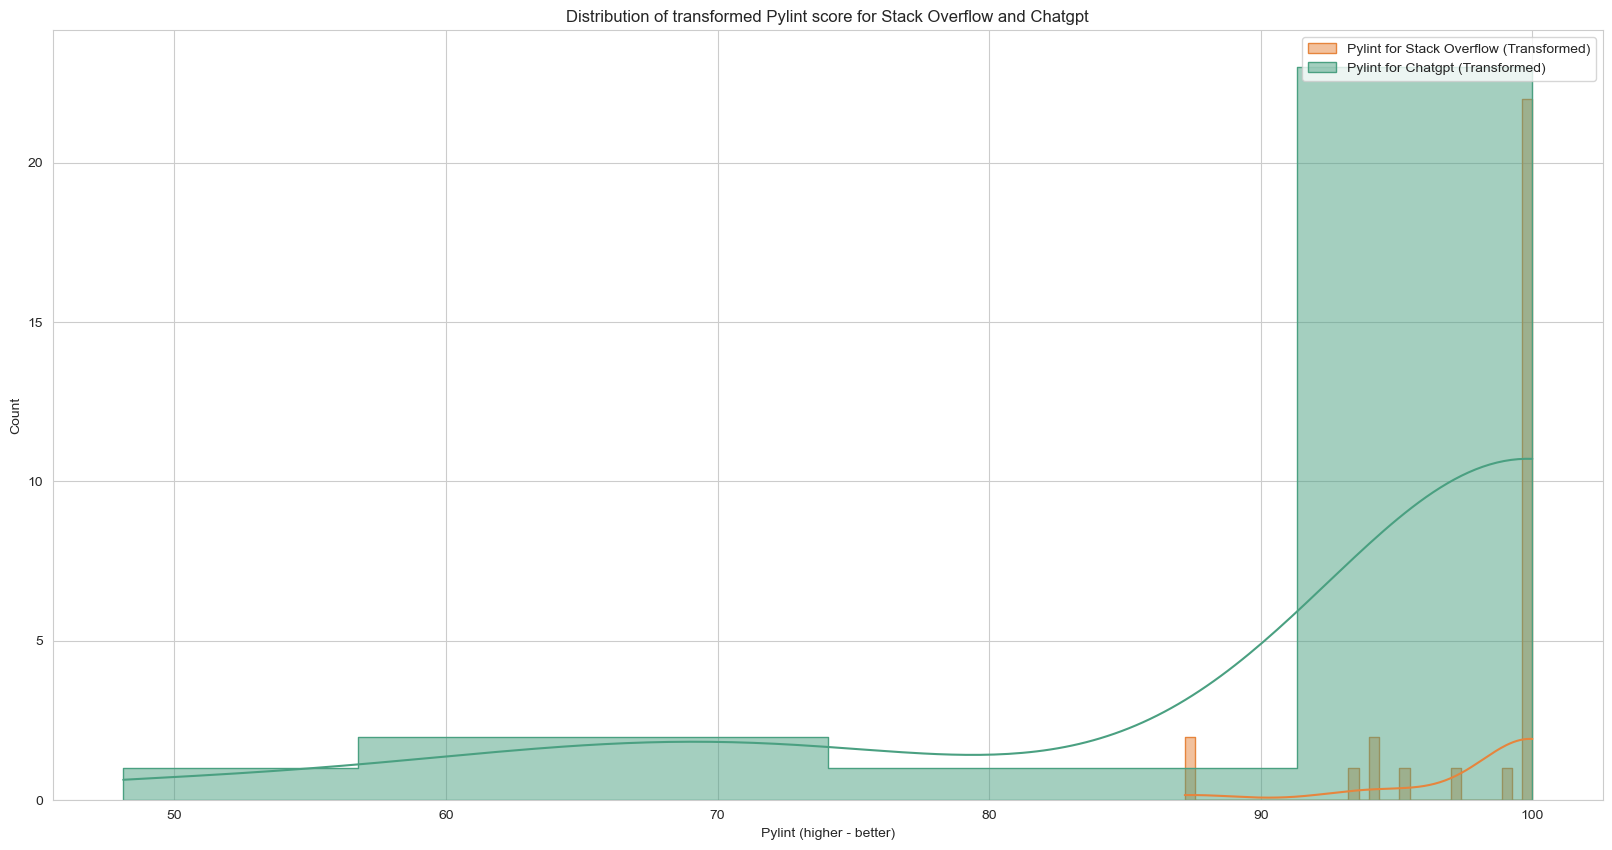

In [22]:
plt.figure(figsize=(20, 10))

sns.set_style("whitegrid")

ax = sns.histplot(df['measured_pl_so'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Pylint for Stack Overflow (Transformed)')
ax = sns.histplot(df['measured_pl_cg'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Pylint for Chatgpt (Transformed)')

ax.set(xlabel='Pylint (higher - better)', ylabel='Count', title='Distribution of transformed Pylint score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

In [23]:
# mannwhitneyu test
u, p = mannwhitneyu(df['Pylint for Stack Overflow'], df['Pylint for Chatgpt'])
u, p 

(361.0, 0.1882814963336683)

In [24]:
# mannwhitneyu test
u, p = mannwhitneyu(df['measured_pl_cg'], df['measured_pl_so'])
u, p 

(439.0, 0.838236558572401)

In [25]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_pl_cg'], df['measured_pl_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -2.0412977823080833
p-value: 0.04944244559122367


# Flesch

## SO before and after

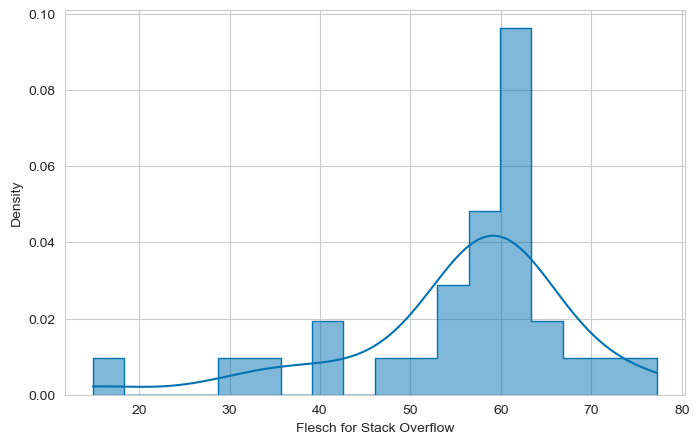

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Flesch for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

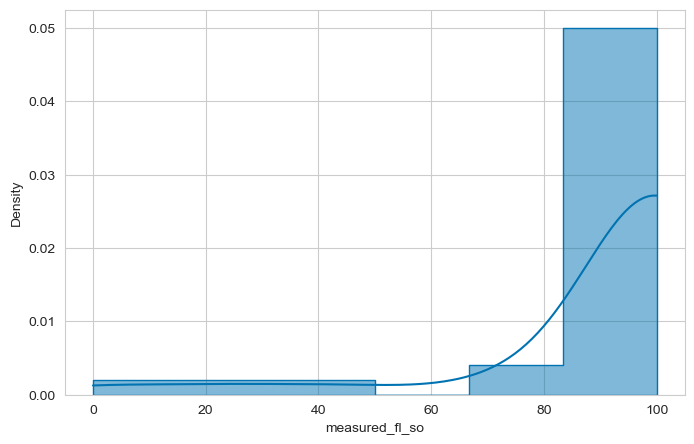

In [27]:
upper_hinge_so_fl, h_spread_so_fl = calculate_upper_hinge_and_h_spread(df, "Flesch for Stack Overflow")
upper_hinge_so_fl, h_spread_so_fl

df['measured_fl_so']= df['Flesch for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so_fl, h_spread_so_fl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_fl_so'], kde=True, stat='density', element='step')
plt.show()

## Chatgpt before and after

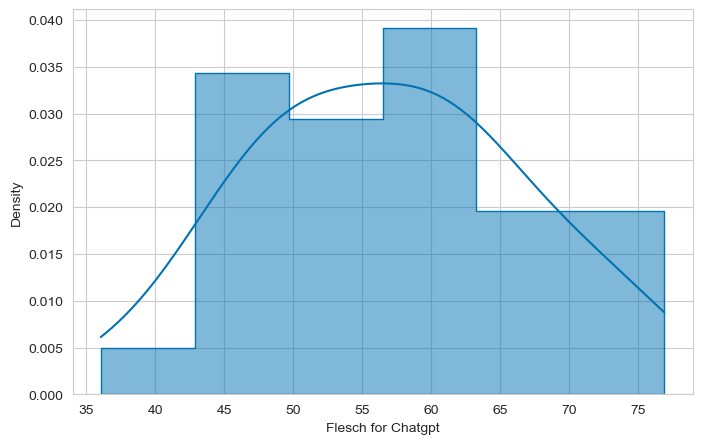

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Flesch for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

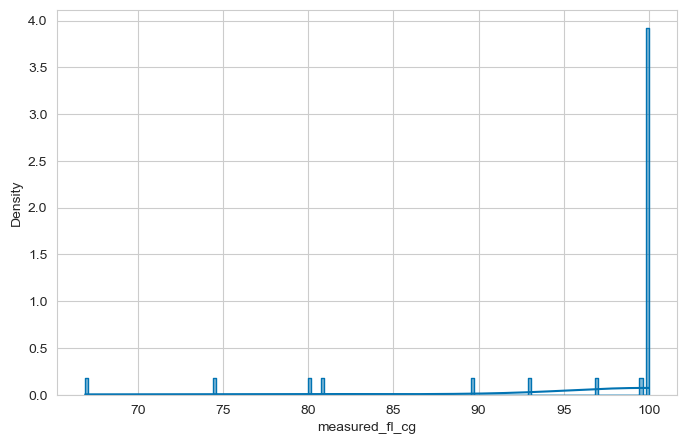

In [29]:
upper_hinge_cg_fl, h_spread_cg_fl = calculate_upper_hinge_and_h_spread(df, "Flesch for Chatgpt")
upper_hinge_cg_fl, h_spread_cg_fl

df['measured_fl_cg']= df['Flesch for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg_fl, h_spread_cg_fl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_fl_cg'], kde=True, stat='density', element='step')
plt.show()

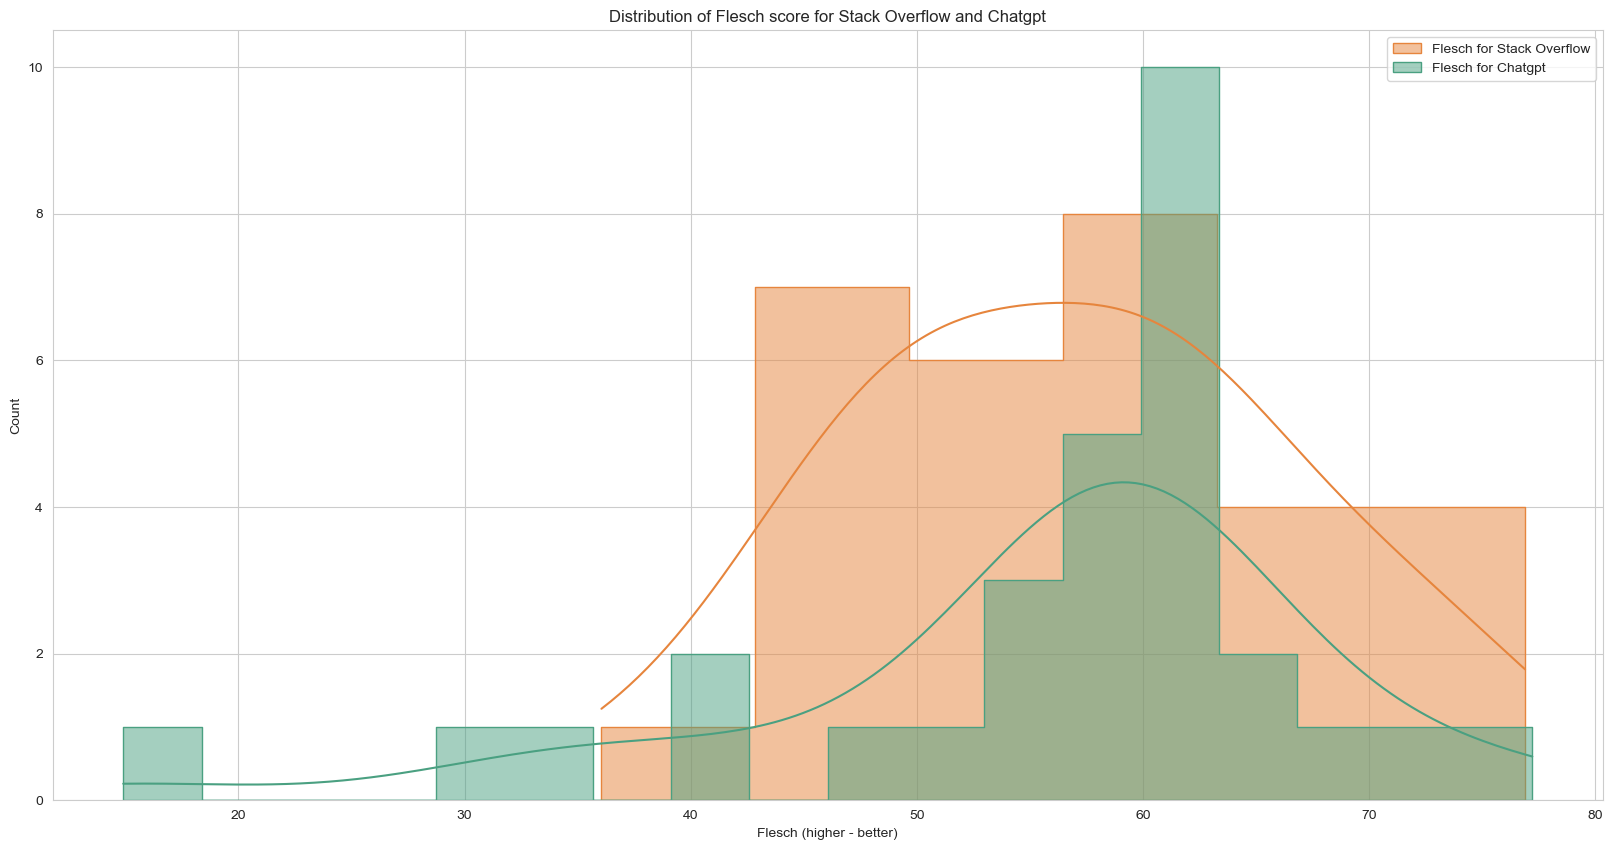

In [30]:
plt.figure(figsize=(20, 10))

sns.set_style("whitegrid")

ax = sns.histplot(df['Flesch for Chatgpt'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Flesch for Stack Overflow')
ax = sns.histplot(df['Flesch for Stack Overflow'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Flesch for Chatgpt')

ax.set(xlabel='Flesch (higher - better)', ylabel='Count', title='Distribution of Flesch score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

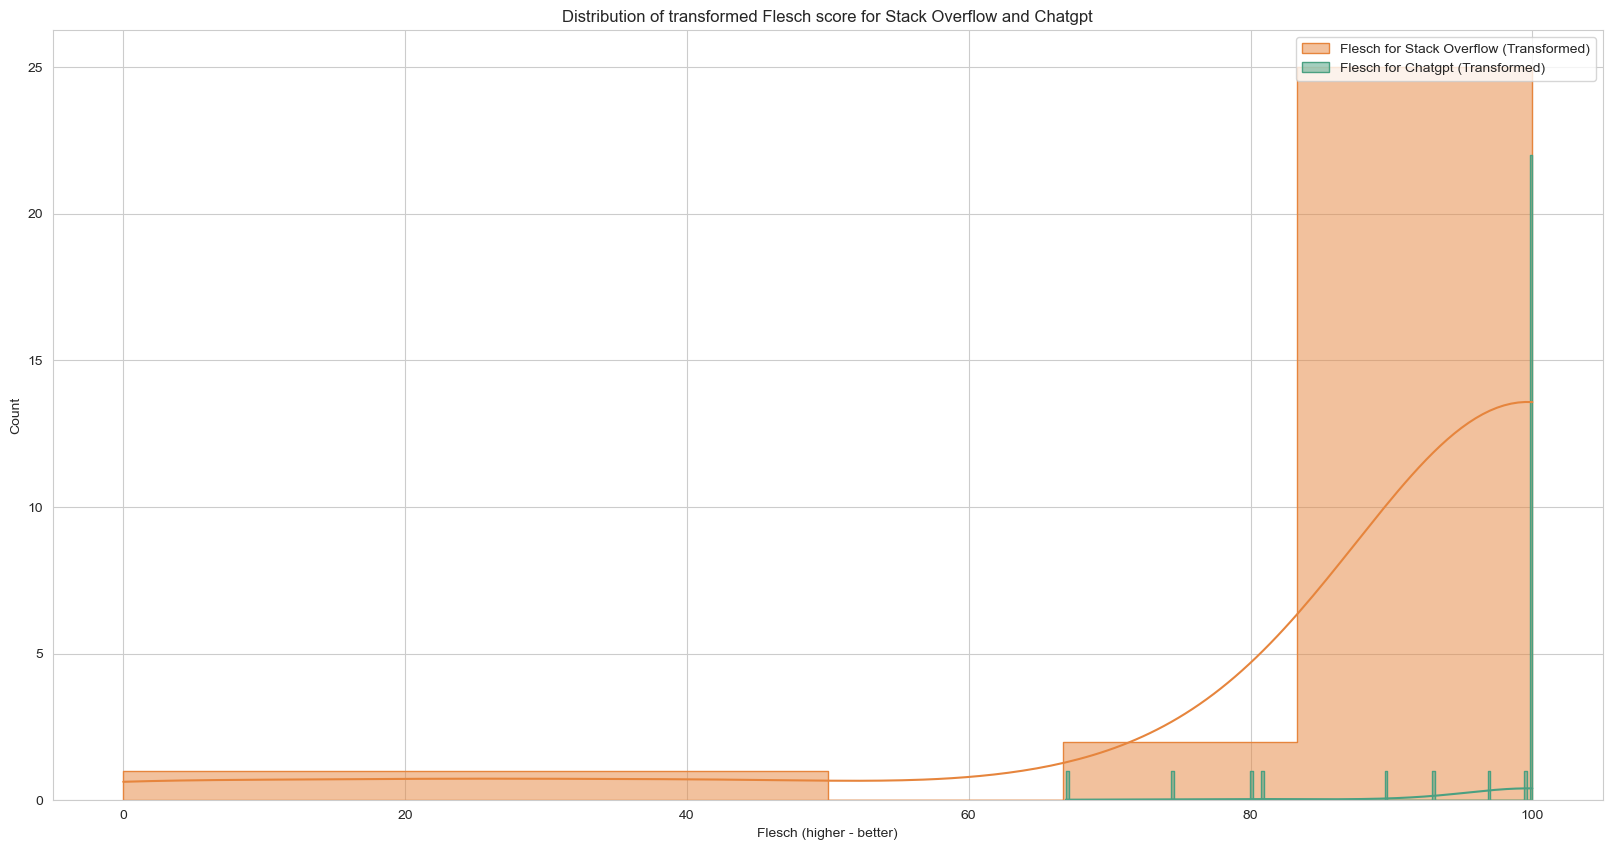

In [31]:
plt.figure(figsize=(20, 10))

sns.set_style("whitegrid")

ax = sns.histplot(df['measured_fl_so'], kde=True, stat='count', element='step', color=(230/255,133/255,61/255), alpha=0.5, label='Flesch for Stack Overflow (Transformed)')
ax = sns.histplot(df['measured_fl_cg'], kde=True, stat='count', element='step', color=(74/255,160/255,129/255), alpha=0.5, label='Flesch for Chatgpt (Transformed)')

ax.set(xlabel='Flesch (higher - better)', ylabel='Count', title='Distribution of transformed Flesch score for Stack Overflow and Chatgpt')
ax.legend()
sns.set_palette('colorblind')

plt.show()

## Reject?

In [32]:
# mannwhitneyu test
u, p = mannwhitneyu(df['Flesch for Stack Overflow'], df['Flesch for Chatgpt'])
u, p 

(451.0, 0.9940838116727677)

In [33]:
# mannwhitneyu test
u, p = mannwhitneyu(df['measured_fl_cg'], df['measured_fl_so'])
u, p 

(421.0, 0.558789272255429)

In [34]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_fl_cg'], df['measured_fl_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 1.1218686503395912
p-value: 0.26929684334183485
